In [ ]:
import pandas as pd

data=pd.read_csv("df_imputed(mean).csv" )

#data


# Specify the columns you want to keep
#columns_to_keep = ['datetime','Load']

# Use indexing to select the desired columns
#df = data[columns_to_keep]
# set the 'datetime_column' as the index
#df.set_index('datetime', inplace=True)
data

,Datetime,Load
0,2019-03-21 00:00:00,454.358527
1,2019-03-21 01:00:00,454.358527
2,2019-03-21 02:00:00,287.419792
3,2019-03-21 03:00:00,258.110368
4,2019-03-21 04:00:00,247.745866
...,...,...
22003,2021-09-22 19:00:00,632.235500
22004,2021-09-22 20:00:00,612.703162
22005,2021-09-22 21:00:00,589.574385
22006,2021-09-22 22:00:00,561.323968


In [ ]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [ ]:
df=data

In [ ]:
df.dtypes

Datetime    datetime64[ns]
Load               float64
dtype: object

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 4)

In [ ]:
df.set_index('Datetime', inplace=True)
df.sort_index(inplace=True)
X = df.drop(labels=[], axis=1)
y = df['Load']

In [ ]:
y

Datetime
2019-03-21 00:00:00    454.358527
2019-03-21 01:00:00    454.358527
2019-03-21 02:00:00    287.419792
2019-03-21 03:00:00    258.110368
2019-03-21 04:00:00    247.745866
                          ...    
2021-09-22 19:00:00    632.235500
2021-09-22 20:00:00    612.703162
2021-09-22 21:00:00    589.574385
2021-09-22 22:00:00    561.323968
2021-09-22 23:00:00    522.105758
Name: Load, Length: 22008, dtype: float64

In [ ]:
X

,Load
Datetime,
2019-03-21 00:00:00,454.358527
2019-03-21 01:00:00,454.358527
2019-03-21 02:00:00,287.419792
2019-03-21 03:00:00,258.110368
2019-03-21 04:00:00,247.745866
...,...
2021-09-22 19:00:00,632.235500
2021-09-22 20:00:00,612.703162
2021-09-22 21:00:00,589.574385


In [ ]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
X_train.index

DatetimeIndex(['2019-03-21 00:00:00', '2019-03-21 01:00:00',
               '2019-03-21 02:00:00', '2019-03-21 03:00:00',
               '2019-03-21 04:00:00', '2019-03-21 05:00:00',
               '2019-03-21 06:00:00', '2019-03-21 07:00:00',
               '2019-03-21 08:00:00', '2019-03-21 09:00:00',
               ...
               '2021-03-23 05:00:00', '2021-03-23 06:00:00',
               '2021-03-23 07:00:00', '2021-03-23 08:00:00',
               '2021-03-23 09:00:00', '2021-03-23 10:00:00',
               '2021-03-23 11:00:00', '2021-03-23 12:00:00',
               '2021-03-23 13:00:00', '2021-03-23 14:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=17607, freq=None)

In [ ]:
X_test.index

DatetimeIndex(['2021-03-23 15:00:00', '2021-03-23 16:00:00',
               '2021-03-23 17:00:00', '2021-03-23 18:00:00',
               '2021-03-23 19:00:00', '2021-03-23 20:00:00',
               '2021-03-23 21:00:00', '2021-03-23 22:00:00',
               '2021-03-23 23:00:00', '2021-03-24 00:00:00',
               ...
               '2021-09-22 14:00:00', '2021-09-22 15:00:00',
               '2021-09-22 16:00:00', '2021-09-22 17:00:00',
               '2021-09-22 18:00:00', '2021-09-22 19:00:00',
               '2021-09-22 20:00:00', '2021-09-22 21:00:00',
               '2021-09-22 22:00:00', '2021-09-22 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=4401, freq=None)

<Axes: xlabel='Datetime'>

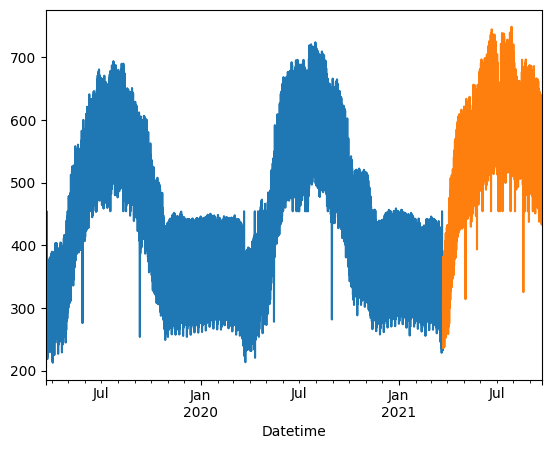

In [ ]:
def price2num(x):
    if type(x) == str:
        x = x.strip('$').replace(',', '')
    return float(x)


#function to convert price from string to floats
y_train=y_train.apply(price2num)
y_train.groupby('Datetime').mean().plot()
y_test=y_test.apply(price2num)
y_test.groupby('Datetime').mean().plot()

In [ ]:
print(X_train.shape, X_test.shape)

(17607, 1) (4401, 1)


In [ ]:
y_train.shape

(17607,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

f_columns = ['Load']  # Define a list of column names to be transformed

f_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for feature transformation
t_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for target transformation

f_transformer = f_transformer.fit(X_train[f_columns].to_numpy())  # Fit the feature transformer to the training data
t_transformer = t_transformer.fit(y_train.to_numpy().reshape(-1, 1))  # Fit the target transformer to the training data

X_train.loc[:, f_columns] = f_transformer.transform(X_train[f_columns].to_numpy())  # Apply feature transformation to the training data
y_train = t_transformer.transform(y_train.to_numpy().reshape(-1, 1))  # Apply target transformation to the training data

X_test.loc[:, f_columns] = f_transformer.transform(X_test[f_columns].to_numpy())  # Apply feature transformation to the test data
y_test = t_transformer.transform(y_test.to_numpy().reshape(-1, 1))  # Apply target transformation to the test data

<ipython-input-15-4d9097f2dad2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, f_columns] = f_transformer.transform(X_train[f_columns].to_numpy())  # Apply feature transformation to the training data
<ipython-input-15-4d9097f2dad2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, f_columns] = f_transformer.transform(X_test[f_columns].to_numpy())  # Apply feature transformation to the test data


In [ ]:
import numpy as np

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 24  # Set the number of time steps to 24

X_train, y_train = create_dataset(X_train, y_train, time_steps)  # Create the training dataset using the 'create_dataset' function

X_test, y_test = create_dataset(X_test, y_test, time_steps)  # Create the test dataset using the 'create_dataset' function



print(X_train.shape,y_train.shape,X_test.shape,  y_test.shape)

(17583, 24, 1) (17583, 1) (4377, 24, 1) (4377, 1)


In [ ]:
!pip install optuna

In [ ]:
import optuna

In [ ]:
import math
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

import tensorflow as tf
from keras.callbacks import EarlyStopping


In [ ]:

def build_model(num_layers, units, dropout_rates, learning_rate):
    model = keras.Sequential()

    for i in range(num_layers):
        return_sequences = (i != num_layers - 1)  # Set return_sequences=True for all but the last layer

        model.add(layers.LSTM(units=units[i], input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=return_sequences))
        model.add(layers.Dropout(dropout_rates[i]))

    model.add(layers.Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error'
      # , metrics=['mae','mape']
        )
    return model

In [ ]:
# Define the objective function for optimization
def objective(trial):
    # Define the hyperparameters to be optimized
    num_layers = trial.suggest_int("num_layers", 1, 5)
    units = [trial.suggest_int(f"units_{i}", 50, 260) for i in range(num_layers)]
    dropout_rates = [trial.suggest_uniform(f"dropout_{i}", 0.0, 0.5) for i in range(num_layers)]
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])

    # Build the model based on the suggested hyperparameters
    model = build_model(num_layers, units, dropout_rates, learning_rate)



    # Define the early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
       # patience=5,
        restore_best_weights=True
    )



    # Train the model
    history = model.fit(
        X_train,
        y_train,
        epochs=50,
        batch_size = batch_size,
        validation_split=0.2,
        callbacks=[early_stopping]
        )

    # Return the validation loss as the objective value to minimize
    return np.min(history.history["val_loss"])


pruner = optuna.pruners.PercentilePruner(percentile=70)  # Adjust the percentile value as needed
#pruner = optuna.pruners.MedianPruner()
# Optimize the hyperparameters using Bayesian optimization
study = optuna.create_study( sampler=optuna.samplers.TPESampler(), direction="minimize" , pruner=pruner)
study.optimize(objective, n_trials=25)

# Get the best hyperparameters and the corresponding objective value
best_params = study.best_params
best_value = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Objective Value:", best_value)

# Build the final model with the best hyperparameters
best_model = build_model(best_params["num_layers"],
                         [best_params[f"units_{i}"] for i in range(best_params["num_layers"])],
                         [best_params[f"dropout_{i}"] for i in range(best_params["num_layers"])])

[I 2024-04-02 09:53:48,678] A new study created in memory with name: no-name-733f40e9-b5be-44fc-ac2a-c88351cc073f
<ipython-input-23-7a9971e8b149>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rates = [trial.suggest_uniform(f"dropout_{i}", 0.0, 0.5) for i in range(num_layers)]
<ipython-input-23-7a9971e8b149>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)


Epoch 1/50
110/110 [==============================] - 108s 694ms/step - loss: 0.1016 - val_loss: 0.0141
Epoch 2/50
110/110 [==============================] - 80s 732ms/step - loss: 0.0189 - val_loss: 0.0141
Epoch 3/50
110/110 [==============================] - 66s 599ms/step - loss: 0.0182 - val_loss: 0.0132
Epoch 4/50
110/110 [==============================] - 66s 600ms/step - loss: 0.0176 - val_loss: 0.0129
Epoch 5/50
110/110 [==============================] - 72s 656ms/step - loss: 0.0173 - val_loss: 0.0124
Epoch 6/50
110/110 [==============================] - 66s 602ms/step - loss: 0.0166 - val_loss: 0.0119
Epoch 7/50
110/110 [==============================] - 74s 672ms/step - loss: 0.0160 - val_loss: 0.0114
Epoch 8/50
110/110 [==============================] - 66s 603ms/step - loss: 0.0153 - val_loss: 0.0107
Epoch 9/50
110/110 [==============================] - 69s 628ms/step - loss: 0.0146 - val_loss: 0.0099
Epoch 10/50
110/110 [==============================] - 68s 619ms/step - 

[I 2024-04-02 10:12:25,045] Trial 0 finished with value: 0.006126366555690765 and parameters: {'num_layers': 4, 'units_0': 172, 'units_1': 118, 'units_2': 163, 'units_3': 147, 'dropout_0': 0.4110936749427714, 'dropout_1': 0.08087774842722939, 'dropout_2': 0.24323705699181675, 'dropout_3': 0.3082885923089861, 'learning_rate': 2.2828027421407476e-05, 'batch_size': 128}. Best is trial 0 with value: 0.006126366555690765.


Epoch 1/50
440/440 [==============================] - 42s 86ms/step - loss: 0.5231 - val_loss: 0.0115
Epoch 2/50
440/440 [==============================] - 37s 84ms/step - loss: 0.0335 - val_loss: 0.0098
Epoch 3/50
440/440 [==============================] - 37s 83ms/step - loss: 0.0452 - val_loss: 0.0058
Epoch 4/50
440/440 [==============================] - 36s 81ms/step - loss: 0.0960 - val_loss: 0.6641


[I 2024-04-02 10:15:23,915] Trial 1 finished with value: 0.005813772790133953 and parameters: {'num_layers': 2, 'units_0': 65, 'units_1': 171, 'dropout_0': 0.037525833218750304, 'dropout_1': 0.35888343476783896, 'learning_rate': 0.07964241419455854, 'batch_size': 32}. Best is trial 1 with value: 0.005813772790133953.


Epoch 1/50
220/220 [==============================] - 61s 235ms/step - loss: 0.4017 - val_loss: 0.0624
Epoch 2/50
220/220 [==============================] - 58s 263ms/step - loss: 0.0773 - val_loss: 0.0803


[I 2024-04-02 10:18:18,198] Trial 2 finished with value: 0.06237497925758362 and parameters: {'num_layers': 3, 'units_0': 170, 'units_1': 180, 'units_2': 120, 'dropout_0': 0.221083368339694, 'dropout_1': 0.4411653109293515, 'dropout_2': 0.280183437438551, 'learning_rate': 0.06285323256846155, 'batch_size': 64}. Best is trial 1 with value: 0.005813772790133953.


Epoch 1/50
110/110 [==============================] - 10s 70ms/step - loss: 0.0165 - val_loss: 0.0048
Epoch 2/50
110/110 [==============================] - 13s 115ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 3/50
110/110 [==============================] - 8s 76ms/step - loss: 0.0031 - val_loss: 0.0019
Epoch 4/50
110/110 [==============================] - 8s 70ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 5/50
110/110 [==============================] - 8s 70ms/step - loss: 0.0022 - val_loss: 8.8000e-04
Epoch 6/50
110/110 [==============================] - 12s 114ms/step - loss: 0.0020 - val_loss: 8.2300e-04
Epoch 7/50
110/110 [==============================] - 9s 80ms/step - loss: 0.0018 - val_loss: 6.9214e-04
Epoch 8/50
110/110 [==============================] - 7s 65ms/step - loss: 0.0017 - val_loss: 6.8340e-04
Epoch 9/50
110/110 [==============================] - 9s 81ms/step - loss: 0.0016 - val_loss: 5.8130e-04
Epoch 10/50
110/110 [==============================] - 13s 117ms/s

[I 2024-04-02 10:20:11,682] Trial 3 finished with value: 0.0004884548834525049 and parameters: {'num_layers': 1, 'units_0': 117, 'dropout_0': 0.09288115435788319, 'learning_rate': 0.0031512287518857887, 'batch_size': 128}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
440/440 [==============================] - 79s 169ms/step - loss: 0.0289 - val_loss: 0.0127
Epoch 2/50
440/440 [==============================] - 70s 159ms/step - loss: 0.0151 - val_loss: 0.0102
Epoch 3/50
440/440 [==============================] - 68s 155ms/step - loss: 0.0110 - val_loss: 0.0054
Epoch 4/50
440/440 [==============================] - 66s 151ms/step - loss: 0.0083 - val_loss: 0.0040
Epoch 5/50
440/440 [==============================] - 70s 159ms/step - loss: 0.0072 - val_loss: 0.0037
Epoch 6/50
440/440 [==============================] - 70s 160ms/step - loss: 0.0066 - val_loss: 0.0032
Epoch 7/50
440/440 [==============================] - 72s 164ms/step - loss: 0.0063 - val_loss: 0.0032
Epoch 8/50
440/440 [==============================] - 71s 160ms/step - loss: 0.0062 - val_loss: 0.0033


[I 2024-04-02 10:29:38,427] Trial 4 finished with value: 0.0031990408897399902 and parameters: {'num_layers': 2, 'units_0': 149, 'units_1': 248, 'dropout_0': 0.3575232176055223, 'dropout_1': 0.3397927888874949, 'learning_rate': 3.672169661533121e-05, 'batch_size': 32}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
220/220 [==============================] - 93s 389ms/step - loss: 0.0184 - val_loss: 0.0030
Epoch 2/50
220/220 [==============================] - 77s 350ms/step - loss: 0.0079 - val_loss: 0.0023
Epoch 3/50
220/220 [==============================] - 77s 349ms/step - loss: 0.0063 - val_loss: 0.0025


[I 2024-04-02 10:34:45,824] Trial 5 finished with value: 0.0022778038401156664 and parameters: {'num_layers': 4, 'units_0': 182, 'units_1': 192, 'units_2': 69, 'units_3': 212, 'dropout_0': 0.42669654078278363, 'dropout_1': 0.1664041324394943, 'dropout_2': 0.32020836208413683, 'dropout_3': 0.3552537542193066, 'learning_rate': 0.0009095210663120015, 'batch_size': 64}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
220/220 [==============================] - 12s 46ms/step - loss: 0.0219 - val_loss: 0.0068
Epoch 2/50
220/220 [==============================] - 9s 43ms/step - loss: 0.0084 - val_loss: 0.0036
Epoch 3/50
220/220 [==============================] - 8s 38ms/step - loss: 0.0063 - val_loss: 0.0025
Epoch 4/50
220/220 [==============================] - 10s 46ms/step - loss: 0.0054 - val_loss: 0.0020
Epoch 5/50
220/220 [==============================] - 10s 47ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 6/50
220/220 [==============================] - 10s 47ms/step - loss: 0.0042 - val_loss: 0.0013
Epoch 7/50
220/220 [==============================] - 8s 38ms/step - loss: 0.0038 - val_loss: 0.0010
Epoch 8/50
220/220 [==============================] - 10s 44ms/step - loss: 0.0037 - val_loss: 9.5746e-04
Epoch 9/50
220/220 [==============================] - 10s 46ms/step - loss: 0.0033 - val_loss: 0.0010


[I 2024-04-02 10:36:15,151] Trial 6 finished with value: 0.0009574562427587807 and parameters: {'num_layers': 1, 'units_0': 108, 'dropout_0': 0.43703949507588474, 'learning_rate': 0.0007826018323473119, 'batch_size': 64}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
220/220 [==============================] - 78s 325ms/step - loss: 0.0774 - val_loss: 0.0146
Epoch 2/50
220/220 [==============================] - 67s 304ms/step - loss: 0.0173 - val_loss: 0.0141
Epoch 3/50
220/220 [==============================] - 64s 291ms/step - loss: 0.0169 - val_loss: 0.0136
Epoch 4/50
220/220 [==============================] - 66s 299ms/step - loss: 0.0164 - val_loss: 0.0132
Epoch 5/50
220/220 [==============================] - 64s 291ms/step - loss: 0.0158 - val_loss: 0.0125
Epoch 6/50
220/220 [==============================] - 65s 294ms/step - loss: 0.0150 - val_loss: 0.0116
Epoch 7/50
220/220 [==============================] - 64s 289ms/step - loss: 0.0138 - val_loss: 0.0106
Epoch 8/50
220/220 [==============================] - 70s 319ms/step - loss: 0.0123 - val_loss: 0.0093
Epoch 9/50
220/220 [==============================] - 65s 295ms/step - loss: 0.0106 - val_loss: 0.0073
Epoch 10/50
220/220 [==============================] - 64s 293ms/step - l

[I 2024-04-02 11:11:42,255] Trial 7 finished with value: 0.0026487824507057667 and parameters: {'num_layers': 3, 'units_0': 236, 'units_1': 213, 'units_2': 122, 'dropout_0': 0.08219742732846608, 'dropout_1': 0.12122816402427294, 'dropout_2': 0.06747968054984321, 'learning_rate': 1.1272024646047257e-05, 'batch_size': 64}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
880/880 [==============================] - 52s 55ms/step - loss: 0.0255 - val_loss: 0.0118
Epoch 2/50
880/880 [==============================] - 49s 56ms/step - loss: 0.0132 - val_loss: 0.0075
Epoch 3/50
880/880 [==============================] - 47s 54ms/step - loss: 0.0088 - val_loss: 0.0046
Epoch 4/50
880/880 [==============================] - 47s 53ms/step - loss: 0.0070 - val_loss: 0.0035
Epoch 5/50
880/880 [==============================] - 49s 55ms/step - loss: 0.0065 - val_loss: 0.0032
Epoch 6/50
880/880 [==============================] - 48s 54ms/step - loss: 0.0061 - val_loss: 0.0029
Epoch 7/50
880/880 [==============================] - 48s 54ms/step - loss: 0.0056 - val_loss: 0.0028
Epoch 8/50
880/880 [==============================] - 47s 54ms/step - loss: 0.0056 - val_loss: 0.0027
Epoch 9/50
880/880 [==============================] - 47s 53ms/step - loss: 0.0053 - val_loss: 0.0026
Epoch 10/50
880/880 [==============================] - 49s 56ms/step - loss: 0.005

[I 2024-04-02 11:22:57,281] Trial 8 finished with value: 0.002318849554285407 and parameters: {'num_layers': 2, 'units_0': 76, 'units_1': 165, 'dropout_0': 0.32477510350375455, 'dropout_1': 0.1577649434981948, 'learning_rate': 3.093489791369661e-05, 'batch_size': 16}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
880/880 [==============================] - 71s 74ms/step - loss: 0.2056 - val_loss: 0.0032
Epoch 2/50
880/880 [==============================] - 64s 73ms/step - loss: 0.0128 - val_loss: 0.0070


[I 2024-04-02 11:25:23,347] Trial 9 finished with value: 0.00319896568544209 and parameters: {'num_layers': 2, 'units_0': 107, 'units_1': 186, 'dropout_0': 0.10831850860122733, 'dropout_1': 0.27966750004066737, 'learning_rate': 0.06463617295582966, 'batch_size': 16}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
110/110 [==============================] - 89s 727ms/step - loss: 0.2512 - val_loss: 0.0077
Epoch 2/50
110/110 [==============================] - 72s 652ms/step - loss: 0.0123 - val_loss: 0.0059
Epoch 3/50
110/110 [==============================] - 78s 706ms/step - loss: 0.0097 - val_loss: 0.0033
Epoch 4/50
110/110 [==============================] - 74s 676ms/step - loss: 0.0077 - val_loss: 0.0050


[I 2024-04-02 11:30:49,790] Trial 10 finished with value: 0.0032760913018137217 and parameters: {'num_layers': 5, 'units_0': 252, 'units_1': 52, 'units_2': 258, 'units_3': 50, 'units_4': 231, 'dropout_0': 0.2273593517146566, 'dropout_1': 0.008116818970907214, 'dropout_2': 0.4757093821686275, 'dropout_3': 0.007704557679763191, 'dropout_4': 0.4562457707885116, 'learning_rate': 0.005337939313196371, 'batch_size': 128}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
110/110 [==============================] - 10s 77ms/step - loss: 0.0318 - val_loss: 0.0109
Epoch 2/50
110/110 [==============================] - 8s 72ms/step - loss: 0.0139 - val_loss: 0.0064
Epoch 3/50
110/110 [==============================] - 7s 63ms/step - loss: 0.0090 - val_loss: 0.0038
Epoch 4/50
110/110 [==============================] - 8s 72ms/step - loss: 0.0077 - val_loss: 0.0028
Epoch 5/50
110/110 [==============================] - 7s 62ms/step - loss: 0.0064 - val_loss: 0.0024
Epoch 6/50
110/110 [==============================] - 8s 73ms/step - loss: 0.0062 - val_loss: 0.0023
Epoch 7/50
110/110 [==============================] - 8s 73ms/step - loss: 0.0055 - val_loss: 0.0017
Epoch 8/50
110/110 [==============================] - 7s 63ms/step - loss: 0.0049 - val_loss: 0.0015
Epoch 9/50
110/110 [==============================] - 8s 73ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 10/50
110/110 [==============================] - 7s 63ms/step - loss: 0.0045 - val_l

[I 2024-04-02 11:32:25,615] Trial 11 finished with value: 0.001493176445364952 and parameters: {'num_layers': 1, 'units_0': 114, 'dropout_0': 0.48892079920018955, 'learning_rate': 0.0008509850434193138, 'batch_size': 128}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
110/110 [==============================] - 10s 66ms/step - loss: 0.0206 - val_loss: 0.0046
Epoch 2/50
110/110 [==============================] - 8s 71ms/step - loss: 0.0045 - val_loss: 0.0018
Epoch 3/50
110/110 [==============================] - 7s 62ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 4/50
110/110 [==============================] - 8s 70ms/step - loss: 0.0025 - val_loss: 9.4868e-04
Epoch 5/50
110/110 [==============================] - 8s 72ms/step - loss: 0.0023 - val_loss: 8.8298e-04
Epoch 6/50
110/110 [==============================] - 7s 63ms/step - loss: 0.0020 - val_loss: 9.6450e-04


[I 2024-04-02 11:33:13,008] Trial 12 finished with value: 0.0008829798316583037 and parameters: {'num_layers': 1, 'units_0': 112, 'dropout_0': 0.14550539349598143, 'learning_rate': 0.0055655718764792365, 'batch_size': 128}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
110/110 [==============================] - 13s 86ms/step - loss: 0.0105 - val_loss: 0.0024
Epoch 2/50
110/110 [==============================] - 10s 89ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 3/50
110/110 [==============================] - 10s 90ms/step - loss: 0.0026 - val_loss: 9.6004e-04
Epoch 4/50
110/110 [==============================] - 10s 89ms/step - loss: 0.0022 - val_loss: 7.4329e-04
Epoch 5/50
110/110 [==============================] - 9s 79ms/step - loss: 0.0019 - val_loss: 6.3701e-04
Epoch 6/50
110/110 [==============================] - 11s 104ms/step - loss: 0.0017 - val_loss: 9.4642e-04


[I 2024-04-02 11:34:16,013] Trial 13 finished with value: 0.0006370088085532188 and parameters: {'num_layers': 1, 'units_0': 138, 'dropout_0': 0.15494311186515916, 'learning_rate': 0.006494107445394291, 'batch_size': 128}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
110/110 [==============================] - 12s 88ms/step - loss: 0.0197 - val_loss: 0.0047
Epoch 2/50
110/110 [==============================] - 10s 93ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 3/50
110/110 [==============================] - 10s 89ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 4/50
110/110 [==============================] - 10s 89ms/step - loss: 0.0019 - val_loss: 9.6745e-04
Epoch 5/50
110/110 [==============================] - 9s 79ms/step - loss: 0.0017 - val_loss: 7.7053e-04
Epoch 6/50
110/110 [==============================] - 10s 90ms/step - loss: 0.0015 - val_loss: 6.8166e-04
Epoch 7/50
110/110 [==============================] - 10s 90ms/step - loss: 0.0014 - val_loss: 6.9109e-04


[I 2024-04-02 11:35:26,742] Trial 14 finished with value: 0.0006816620589233935 and parameters: {'num_layers': 1, 'units_0': 143, 'dropout_0': 0.0012935535600230863, 'learning_rate': 0.011323693765686036, 'batch_size': 128}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
110/110 [==============================] - 16s 128ms/step - loss: 0.0263 - val_loss: 0.0112
Epoch 2/50
110/110 [==============================] - 14s 124ms/step - loss: 0.0124 - val_loss: 0.0082
Epoch 3/50
110/110 [==============================] - 13s 123ms/step - loss: 0.0078 - val_loss: 0.0036
Epoch 4/50
110/110 [==============================] - 14s 127ms/step - loss: 0.0056 - val_loss: 0.0030
Epoch 5/50
110/110 [==============================] - 14s 126ms/step - loss: 0.0050 - val_loss: 0.0026
Epoch 6/50
110/110 [==============================] - 14s 123ms/step - loss: 0.0047 - val_loss: 0.0033


[I 2024-04-02 11:36:51,723] Trial 15 finished with value: 0.002578211482614279 and parameters: {'num_layers': 1, 'units_0': 206, 'dropout_0': 0.16570290825791242, 'learning_rate': 0.0002886831338649403, 'batch_size': 128}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
110/110 [==============================] - 23s 177ms/step - loss: 0.0853 - val_loss: 0.0094
Epoch 2/50
110/110 [==============================] - 17s 159ms/step - loss: 0.0108 - val_loss: 0.0026
Epoch 3/50
110/110 [==============================] - 19s 171ms/step - loss: 0.0061 - val_loss: 0.0016
Epoch 4/50
110/110 [==============================] - 20s 180ms/step - loss: 0.0046 - val_loss: 0.0012
Epoch 5/50
110/110 [==============================] - 19s 169ms/step - loss: 0.0044 - val_loss: 9.5773e-04
Epoch 6/50
110/110 [==============================] - 17s 159ms/step - loss: 0.0036 - val_loss: 0.0012


[I 2024-04-02 11:38:47,544] Trial 16 finished with value: 0.0009577266755513847 and parameters: {'num_layers': 2, 'units_0': 134, 'units_1': 110, 'dropout_0': 0.2902503683718124, 'dropout_1': 0.4837619819745761, 'learning_rate': 0.012870329556539377, 'batch_size': 128}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
110/110 [==============================] - 49s 396ms/step - loss: 0.0305 - val_loss: 0.0136
Epoch 2/50
110/110 [==============================] - 43s 395ms/step - loss: 0.0140 - val_loss: 0.0081
Epoch 3/50
110/110 [==============================] - 43s 395ms/step - loss: 0.0098 - val_loss: 0.0045
Epoch 4/50
110/110 [==============================] - 45s 407ms/step - loss: 0.0078 - val_loss: 0.0031
Epoch 5/50
110/110 [==============================] - 42s 386ms/step - loss: 0.0065 - val_loss: 0.0027
Epoch 6/50
110/110 [==============================] - 42s 379ms/step - loss: 0.0057 - val_loss: 0.0027
Epoch 7/50
110/110 [==============================] - 42s 386ms/step - loss: 0.0053 - val_loss: 0.0029


[I 2024-04-02 11:44:25,473] Trial 17 finished with value: 0.00265422067604959 and parameters: {'num_layers': 3, 'units_0': 201, 'units_1': 60, 'units_2': 260, 'dropout_0': 0.17370011505644767, 'dropout_1': 0.24273293823186343, 'dropout_2': 0.028486617543759862, 'learning_rate': 0.0002434026430828591, 'batch_size': 128}. Best is trial 3 with value: 0.0004884548834525049.


Epoch 1/50
149/440 [=========>....................] - ETA: 1:04 - loss: 0.0303

In [ ]:
# Print the best hyperparameters and the corresponding objective value
print("Best Hyperparameters:", study.best_params)
print("Best Objective Value:", study.best_value)

Best Hyperparameters: {'num_layers': 2, 'units_0': 95, 'units_1': 199, 'dropout_0': 0.36027000923610997, 'dropout_1': 0.4406127962286421}
Best Objective Value: 0.000251235906034708


# [**Plots**](https://medium.com/optuna/visualizing-hyperparameters-in-optuna-86c224bd255f)

In [ ]:
# Generate Optuna optimization history plot
fig = optuna.visualization.plot_optimization_history(study)
fig.show()


In [ ]:
# Generate Optuna slice plot
fig = optuna.visualization.plot_slice(study)
fig.show()

In [ ]:
# Generate Optuna parallel coordinate plot
fig = optuna.visualization.plot_parallel_coordinate(study)
fig.show()

In [ ]:
# Generate Optuna parameter importance plot
fig = optuna.visualization.plot_param_importances(study)
fig.show()

In [ ]:
# Generate Optuna parameter importance plot
fig = optuna.visualization.plot_contour(study, ['num_layers', 'units_0'])

fig.show()